In [326]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly"
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import chart_studio
username='damaniayash'
api_key='oxtGTBN01eBla2Q4Q8pP'
chart_studio.tools.set_credentials_file(username=username,api_key=api_key)
import chart_studio.plotly as py
import chart_studio.tools as tls

In [251]:
pollutant_who = {}
pollutant_who['co']   = 0
pollutant_who['no2']  = 0
pollutant_who['o3']   = 100 ##  8-hour mean
pollutant_who['pm10'] = 50
pollutant_who['pm25'] = 25
pollutant_who['so2']  = 20  

## annual in 'industrial, residential, rural, others' areas
pollutant_naaqs = {}
pollutant_naaqs['co']   = 2   ##  8-hour mean
pollutant_naaqs['no2']  = 80
pollutant_naaqs['o3']   = 100 ##  8-hour mean
pollutant_naaqs['pm10'] = 100
pollutant_naaqs['pm25'] = 60
pollutant_naaqs['so2']  = 80  

# Dates 
start='2019-01-01'
end='2019-07-28'
pollutant_who['pm25']

25

In [219]:
df19=pd.read_csv(f'data/2019_7cities.csv')
print(df19.City.unique())
print(df19.Specie.unique())
df19

['Bengaluru' 'Chennai' 'Delhi' 'Hyderabad' 'Kolkata' 'Mumbai'
 'Visakhapatnam']
['co' 'no2' 'o3' 'pm10' 'pm25' 'so2']


,Date,Country,City,Specie,count,min,max,median,variance
0,31/12/2018,IN,Bengaluru,co,205,1.0,39.5,6.7,443.53
1,01/01/2019,IN,Bengaluru,co,218,1.2,36.0,7.7,261.60
2,02/01/2019,IN,Bengaluru,co,217,0.9,35.9,7.0,405.96
3,03/01/2019,IN,Bengaluru,co,217,0.2,33.2,6.7,317.93
4,04/01/2019,IN,Bengaluru,co,206,0.1,36.0,7.8,369.57
...,...,...,...,...,...,...,...,...,...
15323,01/01/2020,IN,Visakhapatnam,so2,24,3.0,5.0,4.2,2.25
15324,02/01/2020,IN,Visakhapatnam,so2,24,1.8,7.8,4.5,20.83
15325,03/01/2020,IN,Visakhapatnam,so2,24,2.1,5.3,4.0,8.67
15326,04/01/2020,IN,Visakhapatnam,so2,24,3.5,5.8,4.9,3.95


In [220]:
df20=pd.read_csv(f'data/2020-28thJuly_7cities.csv')
print(df20.City.unique())
pollutant=['co','no2','o3','pm10','pm25','so2']
df20=df20[df20['Specie'].isin(pollutant)]
print(df20.Specie.unique())

['Bengaluru' 'Chennai' 'Delhi' 'Hyderabad' 'Kolkata' 'Mumbai'
 'Visakhapatnam']
['co' 'no2' 'o3' 'pm10' 'pm25' 'so2']


In [221]:
#Clean up dates
df19['Date']=pd.to_datetime(df19['Date'],format='%d/%m/%Y')
dff19 = df19[df19['Date'].dt.year == 2019]
df20['Date']=pd.to_datetime(df20['Date'],format='%d/%m/%Y')
dff20 = df20[df20['Date'].dt.year == 2020]

In [222]:
start = '2019-01-01'
end = '2019-07-28'
df19=df19[(df19['Date']>=start) & (dff19['Date']<=end)]
start = '2020-01-01'
end = '2020-07-28'
df20=df20[(df20['Date']>=start) & (dff20['Date']<=end)]
df20

,Date,Country,City,Specie,count,min,max,median,variance
2,2020-01-01,IN,Bengaluru,co,180,1.2,40.2,9.8,246.08
3,2020-01-02,IN,Bengaluru,co,192,0.2,60.3,9.3,570.86
4,2020-01-03,IN,Bengaluru,co,237,0.7,86.4,8.0,523.38
5,2020-01-04,IN,Bengaluru,co,232,0.7,68.3,8.9,1342.10
6,2020-01-05,IN,Bengaluru,co,221,1.3,24.7,8.3,196.34
...,...,...,...,...,...,...,...,...,...
12876,2020-07-24,IN,Visakhapatnam,so2,20,0.3,16.5,4.6,210.32
12877,2020-07-25,IN,Visakhapatnam,so2,15,0.6,4.0,2.9,10.49
12878,2020-07-26,IN,Visakhapatnam,so2,20,0.5,7.3,4.0,21.15
12879,2020-07-27,IN,Visakhapatnam,so2,23,0.1,13.8,3.7,123.86


In [223]:
dff19['Month']=pd.DatetimeIndex(dff19['Date']).month
#dff19['Day']=pd.DatetimeIndex(dff19['Date']).day
df19['md']=df19['Date'].dt.strftime('%m%d')
df19['month_name'] = df19.Date.dt.month_name()
df19=df19.reset_index()
del df19['index']
df19

<ipython-input-223-937647353651>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-223-937647353651>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-223-937647353651>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Country,City,Specie,count,min,max,median,variance,md,month_name
0,2019-01-01,IN,Bengaluru,co,218,1.2,36.0,7.7,261.60,0101,January
1,2019-01-02,IN,Bengaluru,co,217,0.9,35.9,7.0,405.96,0102,January
2,2019-01-03,IN,Bengaluru,co,217,0.2,33.2,6.7,317.93,0103,January
3,2019-01-04,IN,Bengaluru,co,206,0.1,36.0,7.8,369.57,0104,January
4,2019-01-05,IN,Bengaluru,co,196,0.3,37.0,7.8,270.74,0105,January
...,...,...,...,...,...,...,...,...,...,...,...
8499,2019-07-24,IN,Visakhapatnam,so2,21,1.4,12.3,7.8,88.21,0724,July
8500,2019-07-25,IN,Visakhapatnam,so2,20,0.6,6.8,2.5,41.02,0725,July
8501,2019-07-26,IN,Visakhapatnam,so2,22,1.8,13.1,6.6,114.91,0726,July
8502,2019-07-27,IN,Visakhapatnam,so2,18,0.6,11.3,6.8,109.73,0727,July


In [224]:
df20['md']=df20['Date'].dt.strftime('%m%d')
df20['month_name'] = df20.Date.dt.month_name()
df20=df20.reset_index()
del df20['index']

df20

,Date,Country,City,Specie,count,min,max,median,variance,md,month_name
0,2020-01-01,IN,Bengaluru,co,180,1.2,40.2,9.8,246.08,0101,January
1,2020-01-02,IN,Bengaluru,co,192,0.2,60.3,9.3,570.86,0102,January
2,2020-01-03,IN,Bengaluru,co,237,0.7,86.4,8.0,523.38,0103,January
3,2020-01-04,IN,Bengaluru,co,232,0.7,68.3,8.9,1342.10,0104,January
4,2020-01-05,IN,Bengaluru,co,221,1.3,24.7,8.3,196.34,0105,January
...,...,...,...,...,...,...,...,...,...,...,...
8730,2020-07-24,IN,Visakhapatnam,so2,20,0.3,16.5,4.6,210.32,0724,July
8731,2020-07-25,IN,Visakhapatnam,so2,15,0.6,4.0,2.9,10.49,0725,July
8732,2020-07-26,IN,Visakhapatnam,so2,20,0.5,7.3,4.0,21.15,0726,July
8733,2020-07-27,IN,Visakhapatnam,so2,23,0.1,13.8,3.7,123.86,0727,July


In [225]:
if df19['md'].iloc[1] == df20['md'].iloc[1]:
    print('tes')
df19['md'].unique()

tes


array(['0101', '0102', '0103', '0104', '0105', '0106', '0107', '0108',
       '0109', '0110', '0111', '0112', '0113', '0114', '0115', '0116',
       '0117', '0118', '0119', '0120', '0121', '0122', '0123', '0124',
       '0125', '0126', '0127', '0128', '0129', '0130', '0131', '0201',
       '0202', '0203', '0204', '0205', '0206', '0207', '0208', '0209',
       '0210', '0211', '0212', '0213', '0214', '0215', '0216', '0217',
       '0218', '0219', '0220', '0221', '0222', '0223', '0224', '0225',
       '0226', '0227', '0228', '0301', '0302', '0303', '0304', '0305',
       '0306', '0307', '0308', '0309', '0310', '0311', '0312', '0313',
       '0314', '0315', '0316', '0317', '0318', '0319', '0320', '0321',
       '0322', '0323', '0324', '0325', '0326', '0327', '0328', '0329',
       '0330', '0331', '0401', '0402', '0403', '0404', '0405', '0406',
       '0407', '0408', '0409', '0410', '0411', '0412', '0413', '0415',
       '0416', '0417', '0418', '0419', '0420', '0421', '0422', '0423',
      

In [226]:
df=pd.merge(df19,df20,on=['md','City','Specie','Country'])
del df['Country'],df['count_x'],df['min_x'],df['max_x'],df['variance_x'],df['count_y'],df['min_y'],df['max_y'],df['variance_y']
df

,Date_x,City,Specie,median_x,md,month_name_x,Date_y,median_y,month_name_y
0,2019-01-01,Bengaluru,co,7.7,0101,January,2020-01-01,9.8,January
1,2019-01-02,Bengaluru,co,7.0,0102,January,2020-01-02,9.3,January
2,2019-01-03,Bengaluru,co,6.7,0103,January,2020-01-03,8.0,January
3,2019-01-04,Bengaluru,co,7.8,0104,January,2020-01-04,8.9,January
4,2019-01-05,Bengaluru,co,7.8,0105,January,2020-01-05,8.3,January
...,...,...,...,...,...,...,...,...,...
8467,2019-07-24,Visakhapatnam,so2,7.8,0724,July,2020-07-24,4.6,July
8468,2019-07-25,Visakhapatnam,so2,2.5,0725,July,2020-07-25,2.9,July
8469,2019-07-26,Visakhapatnam,so2,6.6,0726,July,2020-07-26,4.0,July
8470,2019-07-27,Visakhapatnam,so2,6.8,0727,July,2020-07-27,3.7,July


In [227]:
imp_pollutant=['pm25','pm10','co']
df_delhi=df[df['City'].isin(['Delhi'])]
df_delhi=df_delhi[df_delhi['Specie'].isin(imp_pollutant)]
df_delhi

,Date_x,City,Specie,median_x,md,month_name_x,Date_y,median_y,month_name_y
416,2019-01-01,Delhi,co,17.6,0101,January,2020-01-01,22.6,January
417,2019-01-02,Delhi,co,19.9,0102,January,2020-01-02,24.3,January
418,2019-01-03,Delhi,co,18.5,0103,January,2020-01-03,20.3,January
419,2019-01-04,Delhi,co,15.0,0104,January,2020-01-04,17.7,January
420,2019-01-05,Delhi,co,15.6,0105,January,2020-01-05,11.3,January
...,...,...,...,...,...,...,...,...,...
6194,2019-07-24,Delhi,pm25,155.0,0724,July,2020-07-24,109.0,July
6195,2019-07-25,Delhi,pm25,65.0,0725,July,2020-07-25,82.0,July
6196,2019-07-26,Delhi,pm25,85.0,0726,July,2020-07-26,107.0,July
6197,2019-07-27,Delhi,pm25,71.0,0727,July,2020-07-27,85.0,July


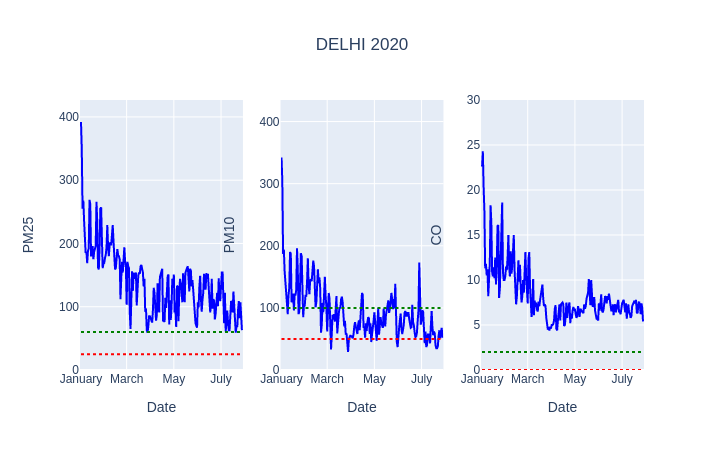

'https://plotly.com/~damaniayash/1/'

In [328]:
fig = make_subplots(
rows=1, cols=3,
#subplot_titles=imp_pollutant,
vertical_spacing=0.05
)
for m,i in enumerate(imp_pollutant):
    dfd=df_delhi[df_delhi['Specie'].isin([i])]
    #fig.add_trace(go.Scatter(x=dfd['Date_x'],y=dfd['median_x'],line_color='blue'),row=1,col=m+1)
    fig.add_trace(go.Scatter(x=dfd['Date_x'],y=dfd['median_y'],line_color='blue'),row=1,col=m+1)
    fig.update_xaxes(tickformat="%B",row=1,col=m+1)
    fig.add_shape(go.layout.Shape(type="line", x0=start, y0=pollutant_who[i], x1=end, y1=pollutant_who[i],
                                  line=dict(color='red', width=2,dash='dot'),),row=1,col=m+1)
    fig.add_shape(go.layout.Shape(type="line", x0=start, y0=pollutant_naaqs[i], x1=end, y1=pollutant_naaqs[i],
                                  line=dict(color='green', width=2,dash='dot'),),row=1,col=m+1)
    fig.update_yaxes(title=i.upper(),range=[0,dfd['median_x'].max() +dfd['median_x'].mean()/10], row=1, col=m+1)
    fig.update_xaxes(title_text="Date", row=1, col=m+1)
fig.update_layout(title='DELHI 2020',title_x=0.5,height=450,width=1300,showlegend=False)
fig.show()
fig.write_image(f'images/19vs20_20_delhi.png')
py.plot(fig, filename='19vs20_delhi20',auto_open=True)

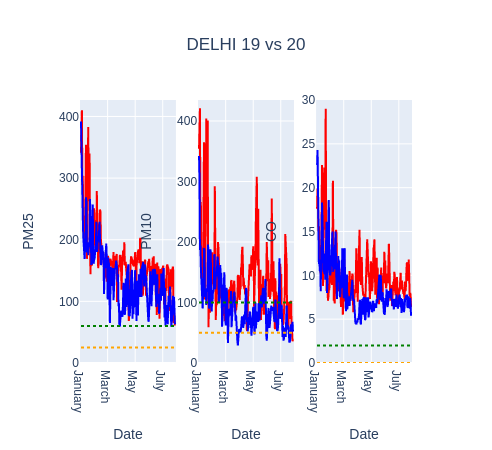

In [288]:
fig = make_subplots(
rows=1, cols=3,
#subplot_titles=imp_pollutant,
vertical_spacing=0.05
)
for m,i in enumerate(imp_pollutant):
    dfd=df_delhi[df_delhi['Specie'].isin([i])]
    fig.add_trace(go.Scatter(x=dfd['Date_x'],y=dfd['median_x'],line_color='red'),row=1,col=m+1)
    fig.update_xaxes(tickformat="%B",row=1,col=m+1)
    fig.add_trace(go.Scatter(x=dfd['Date_x'],y=dfd['median_y'],line_color='blue'),row=1,col=m+1)
    fig.add_shape(go.layout.Shape(type="line", x0=start, y0=pollutant_who[i], x1=end, y1=pollutant_who[i],
                                  line=dict(color='orange', width=2,dash='dot'),),row=1,col=m+1)
    fig.add_shape(go.layout.Shape(type="line", x0=start, y0=pollutant_naaqs[i], x1=end, y1=pollutant_naaqs[i],
                                  line=dict(color='green', width=2,dash='dot'),),row=1,col=m+1)
    fig.update_yaxes(title=i.upper(),range=[0,dfd['median_x'].max() +dfd['median_x'].mean()/10], row=1, col=m+1)
    fig.update_xaxes(title_text="Date", row=1, col=m+1)
fig.update_layout(title='DELHI 19 vs 20',title_x=0.5,height=450,width=1300,showlegend=False)
fig.show()
fig.write_image(f'images/19vs20_delhi.png')

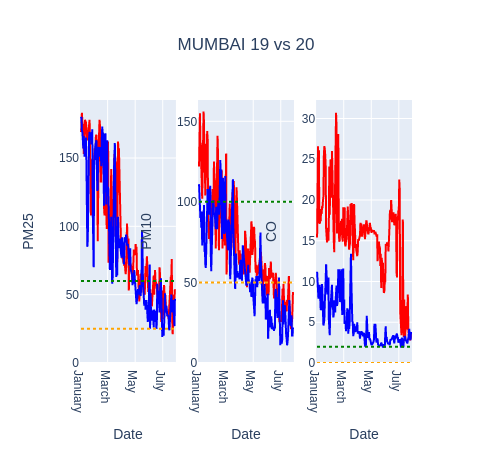

In [290]:
df_mum=df[df['City'].isin(['Mumbai'])]
fig = make_subplots(
rows=1, cols=3,
#subplot_titles=imp_pollutant,
vertical_spacing=0.05
)
for m,i in enumerate(imp_pollutant):
    dfd=df_mum[df_mum['Specie'].isin([i])]
    fig.add_trace(go.Scatter(x=dfd['Date_x'],y=dfd['median_x'],line_color='red'),row=1,col=m+1)
    fig.update_xaxes(tickformat="%B",row=1,col=m+1)
    fig.add_trace(go.Scatter(x=dfd['Date_x'],y=dfd['median_y'],line_color='blue'),row=1,col=m+1)
    fig.add_shape(go.layout.Shape(type="line", x0=start, y0=pollutant_who[i], x1=end, y1=pollutant_who[i],
                                  line=dict(color='orange', width=2,dash='dot'),),row=1,col=m+1)
    fig.add_shape(go.layout.Shape(type="line", x0=start, y0=pollutant_naaqs[i], x1=end, y1=pollutant_naaqs[i],
                                  line=dict(color='green', width=2,dash='dot'),),row=1,col=m+1)
    fig.update_yaxes(title=i.upper(),range=[0,dfd['median_x'].max() +dfd['median_x'].mean()/10], row=1, col=m+1)
    fig.update_xaxes(title_text="Date", row=1, col=m+1)
fig.update_layout(title='MUMBAI 19 vs 20',title_x=0.5,height=450,width=1300,showlegend=False)
fig.show()
fig.write_image(f'images/19vs20_mumbai.png')

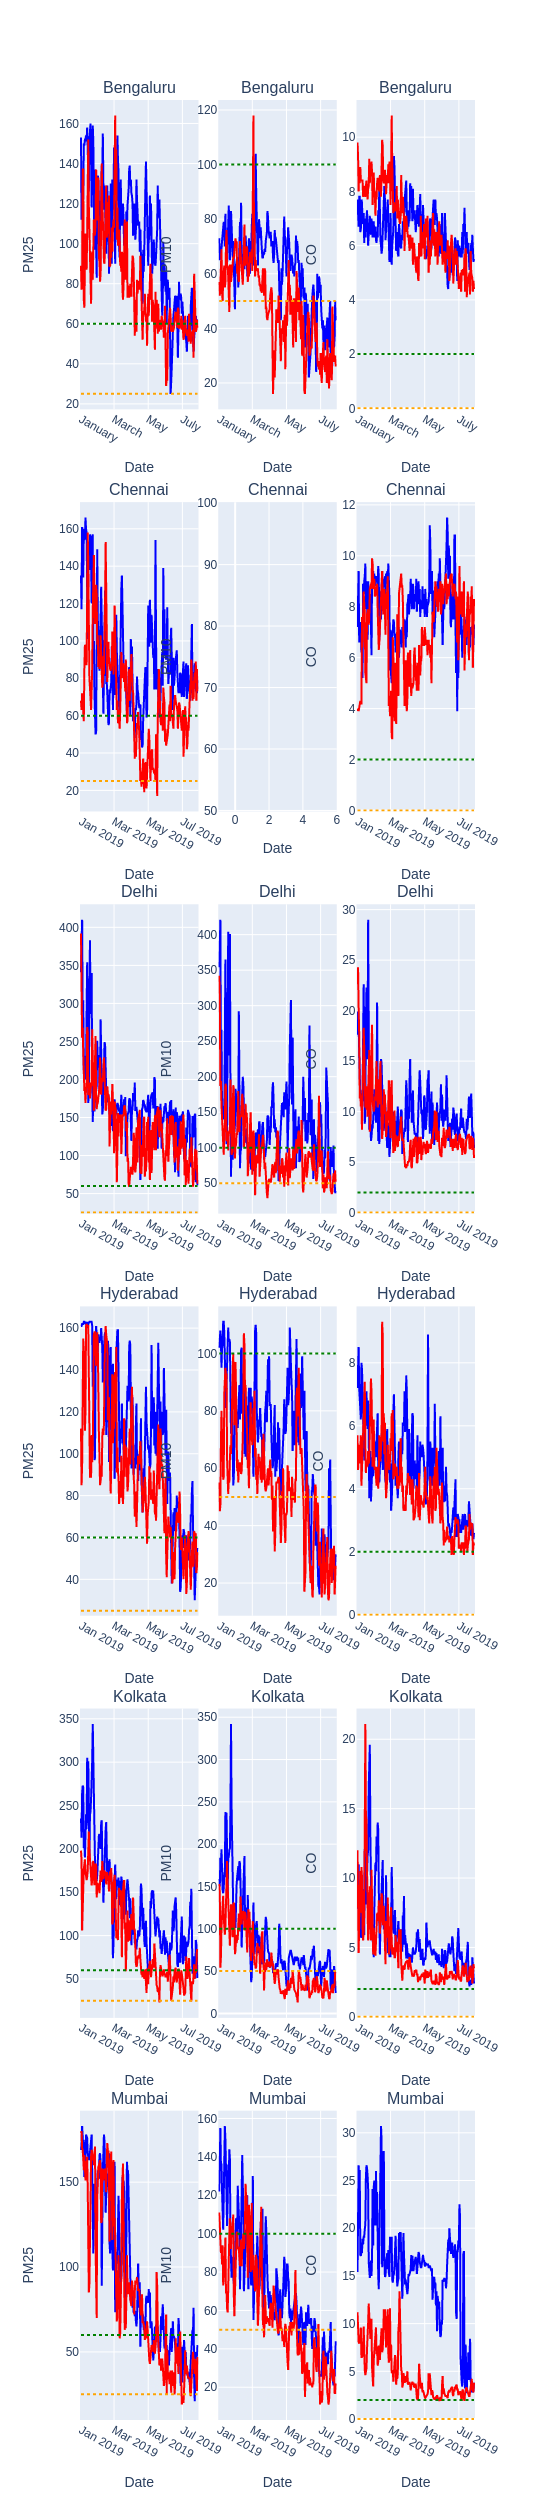

In [323]:
city=['Bengaluru','Chennai','Delhi','Hyderabad','Kolkata','Mumbai']
title=[]
[title.append(i) for i in city for _ in range(3)]
polmax=[]
for i in imp_pollutant:
    dfd=df[df['Specie'].isin([i])]
    polmax.append(dfd['median_x'].max())
fig = make_subplots(
rows=6, cols=3,
subplot_titles=title,
vertical_spacing=0.04,
horizontal_spacing=0.05
)
for n,j in enumerate(city):
    for m,i in enumerate(imp_pollutant):
        dfd=df[df['City'].isin([j])]
        dfd=dfd[dfd['Specie'].isin([i])]
        fig.add_trace(go.Scatter(x=dfd['Date_x'],y=dfd['median_x'],line_color='blue'),row=n+1,col=m+1)
        fig.update_xaxes(tickformat="%B",row=1,col=m+1)
        fig.add_trace(go.Scatter(x=dfd['Date_x'],y=dfd['median_y'],line_color='red'),row=n+1,col=m+1)
        fig.add_shape(go.layout.Shape(type="line", x0=start, y0=pollutant_who[i], x1=end, y1=pollutant_who[i],
                                  line=dict(color='orange', width=2,dash='dot'),),row=n+1,col=m+1)
        fig.add_shape(go.layout.Shape(type="line", x0=start, y0=pollutant_naaqs[i], x1=end, y1=pollutant_naaqs[i],
                                  line=dict(color='green', width=2,dash='dot'),),row=n+1,col=m+1)

        fig.update_yaxes(title=i.upper(), row=n+1, col=m+1)
        fig.update_xaxes(title_text="Date", row=n+1, col=m+1)

fig.update_layout(width=1500,height=2500,showlegend=False)
fig.show()
fig.write_image(f'images/19vs20_allcities.png') 

In [313]:
imp_pollutant

['pm25', 'pm10', 'co']

In [322]:
polmax

[410.0, 421.0, 30.7]